# Set Up Env

In [84]:
!pip install numpy==1.22.4

In [2]:
!pip install scipy==1.9.1

In [85]:
import sys
import os

import sagemaker
from sagemaker import get_execution_role

# Add the parent directory to the sys.path
sys.path.insert(0, os.path.abspath('..'))

# Define IAM role
role = get_execution_role()
role

# Establish S3 bucket connection
import boto3
s3 = boto3.client('s3')
bucket = 'capstone-bucket-4-friends'

print(os.getcwd())

from file_utilities import s3_download 

/home/sagemaker-user/capstone-2024-summer/src/jenna/phase_2


# Import libraries

In [4]:
# standard libraries
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
!pip install seaborn -q
import seaborn as sns

# Load dataset

In [5]:
#crsp_and_comp = "CRSP/sp500_crsp_compustat_merged_2018_2023.csv"
#crsp_and_comp_path = s3_download(crsp_and_comp)

In [6]:
#index = "Index/security_master.csv"
#index_path = s3_download(index)

In [127]:
crsp_and_comp_df = pd.read_csv(
    "/home/sagemaker-user/capstone-2024-summer/src/jenna/data_download/sp500_crsp_compustat_merged_2018_2023.csv",
    parse_dates=["date"],
    low_memory=False
)

crsp_and_comp_df.head()

,cusip,permno,permco,issuno,hexcd,hsiccd,date,bidlo,askhi,prc,...,prccq,prchq,prclq,adjex,naics,shrcd,exchcd,trdstat,primexch,secstat
0,68389X10,10104,8045,10536,1,7379,2018-01-02,46.170,47.8011,46.63,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
1,68389X10,10104,8045,10536,1,7379,2018-01-03,47.440,48.0700,47.71,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
2,68389X10,10104,8045,10536,1,7379,2018-01-04,47.715,48.1900,48.18,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
3,68389X10,10104,8045,10536,1,7379,2018-01-05,48.280,48.6300,48.47,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
4,68389X10,10104,8045,10536,1,7379,2018-01-08,47.940,49.0700,48.98,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R


In [87]:
crsp_and_comp_df.shape

(828593, 673)

In [88]:
crsp_and_comp_df.dtypes

cusip       object
permno       int64
permco       int64
issuno       int64
hexcd        int64
             ...  
shrcd        int64
exchcd       int64
trdstat     object
primexch    object
secstat     object
Length: 673, dtype: object

In [90]:
og_len = len(crsp_and_comp_df)
og_cols = len(crsp_and_comp_df.columns)
print("Number of records:", og_len)
print("Number of columns:", og_cols)

Number of records: 828593
Number of columns: 673


In [80]:
crsp_and_comp_df.columns.tolist()

['cusip_id',
 'permno_id',
 'permco',
 'issuno',
 'hexcd',
 'hsiccd',
 'date',
 'bid_or_low_price',
 'ask_or_high_price',
 'close_price',
 'volume',
 'return',
 'bid_price',
 'ask_price',
 'shares_outstanding',
 'factor_to_adjust_price',
 'factor_to_adjust_shares',
 'open_price',
 'num_trades',
 'retx',
 'gvkey',
 'datadate',
 'fyearq',
 'fqtr',
 'fyr',
 'indfmt',
 'consol',
 'popsrc',
 'datafmt',
 'tic',
 'cusip.1',
 'conm',
 'acctchgq',
 'acctstdq',
 'adrrq',
 'ajexq',
 'ajpq',
 'bsprq',
 'compstq',
 'curcdq',
 'curncdq',
 'currtrq',
 'curuscnq',
 'datacqtr',
 'datafqtr',
 'finalq',
 'ogmq',
 'rp',
 'scfq',
 'srcq',
 'staltq',
 'updq',
 'apdedateq',
 'fdateq',
 'pdateq',
 'rdq',
 'acchgq',
 'acomincq',
 'acoq',
 'actq',
 'altoq',
 'ancq',
 'anoq',
 'aociderglq',
 'aociotherq',
 'aocipenq',
 'aocisecglq',
 'aol2q',
 'aoq',
 'apq',
 'aqaq',
 'aqdq',
 'aqepsq',
 'aqpl1q',
 'aqpq',
 'arcedq',
 'arceepsq',
 'arceq',
 'atq',
 'aul3q',
 'billexceq',
 'capr1q',
 'capr2q',
 'capr3q',
 'capsft

# Null Analysis

In [91]:
# Count the number of nulls in each column
null_counts = crsp_and_comp_df.isnull().sum()

# Calculate the percentage of nulls in each column
total_rows = len(crsp_and_comp_df)
null_percentages = (null_counts / total_rows) * 100

In [92]:
null_table = crsp_and_comp_df.isnull().sum().reset_index()
null_table.columns = ["Column", "Null Values"]

# Add column to show the percentage of null values
null_table["Percentage"] = (null_table["Null Values"] / len(crsp_and_comp_df)) * 100

# Sorting the table by the number of null values in descending order
null_table_sorted = null_table.sort_values(by="Null Values", ascending=False).reset_index(drop=True)
null_table_sorted

,Column,Null Values,Percentage
0,spcep12,828593,100.0
1,prcpepsq,828593,100.0
2,rreps12,828593,100.0
3,rrdq,828593,100.0
4,rrd12,828593,100.0
...,...,...,...
668,hsiccd,0,0.0
669,hexcd,0,0.0
670,issuno,0,0.0
671,permco,0,0.0


## A1. Drop all columns which contains more than 75% null as they cannot be reasonably obtained or imputed.

In [93]:
og_cols = len(crsp_and_comp_df.columns)
columns_to_drop = null_percentages[null_percentages > 75].index
crsp_and_comp_df = crsp_and_comp_df.drop(columns=columns_to_drop)
new_cols = len(crsp_and_comp_df.columns)
print("Number of columns removed: ", og_cols - new_cols)
print("Number of columns kept:", new_cols)

Number of columns removed:  332
Number of columns kept: 341


In [94]:
crsp_and_comp_df.columns.tolist()

['cusip',
 'permno',
 'permco',
 'issuno',
 'hexcd',
 'hsiccd',
 'date',
 'bidlo',
 'askhi',
 'prc',
 'vol',
 'ret',
 'bid',
 'ask',
 'shrout',
 'cfacpr',
 'cfacshr',
 'openprc',
 'numtrd',
 'retx',
 'gvkey',
 'datadate',
 'fyearq',
 'fqtr',
 'fyr',
 'indfmt',
 'consol',
 'popsrc',
 'datafmt',
 'tic',
 'cusip.1',
 'conm',
 'acctstdq',
 'ajexq',
 'ajpq',
 'curcdq',
 'curncdq',
 'currtrq',
 'datacqtr',
 'datafqtr',
 'finalq',
 'rp',
 'scfq',
 'srcq',
 'updq',
 'apdedateq',
 'fdateq',
 'pdateq',
 'rdq',
 'acchgq',
 'acomincq',
 'acoq',
 'actq',
 'altoq',
 'ancq',
 'anoq',
 'aociderglq',
 'aociotherq',
 'aocipenq',
 'aocisecglq',
 'aol2q',
 'aoq',
 'apq',
 'aqaq',
 'aqdq',
 'aqepsq',
 'aqpl1q',
 'aqpq',
 'atq',
 'aul3q',
 'billexceq',
 'capsq',
 'ceqq',
 'cheq',
 'chq',
 'cibegniq',
 'cicurrq',
 'ciderglq',
 'cimiiq',
 'ciotherq',
 'cipenq',
 'ciq',
 'cisecglq',
 'citotalq',
 'cogsq',
 'csh12q',
 'cshfd12',
 'cshfdq',
 'cshiq',
 'cshopq',
 'cshoq',
 'cshprq',
 'cstkcvq',
 'cstkeq',
 'cstkq

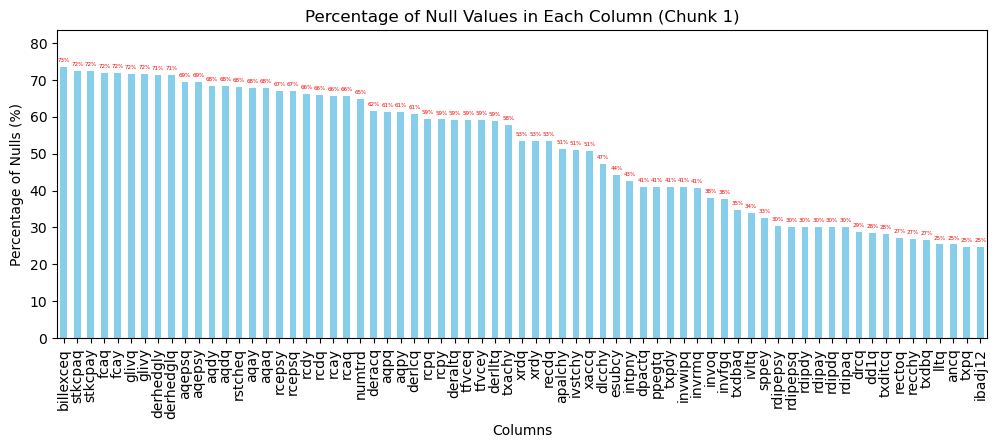

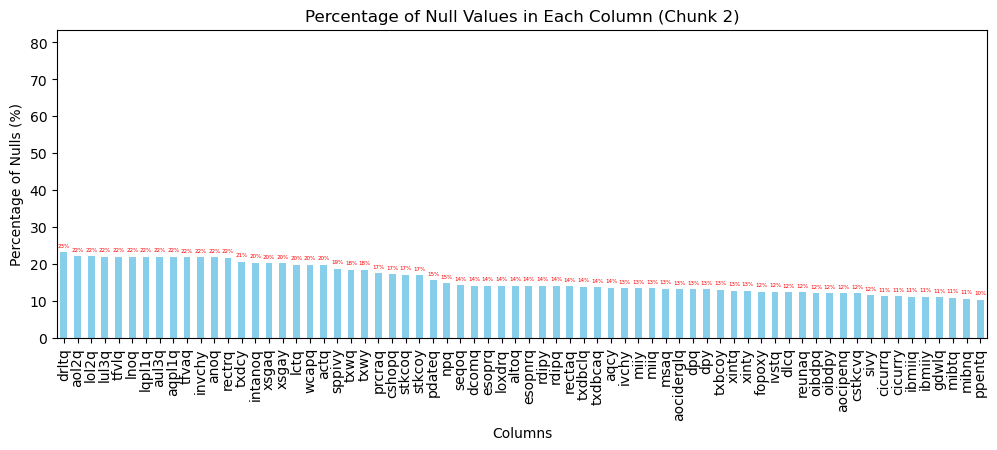

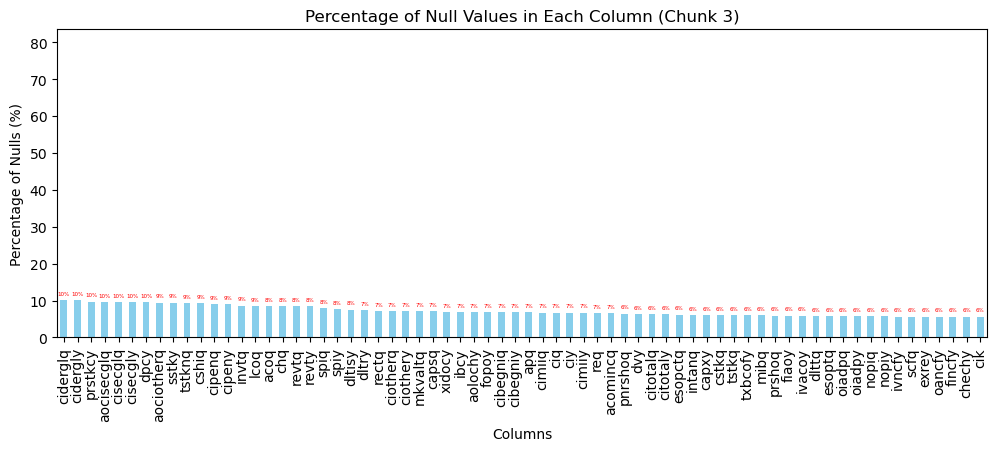

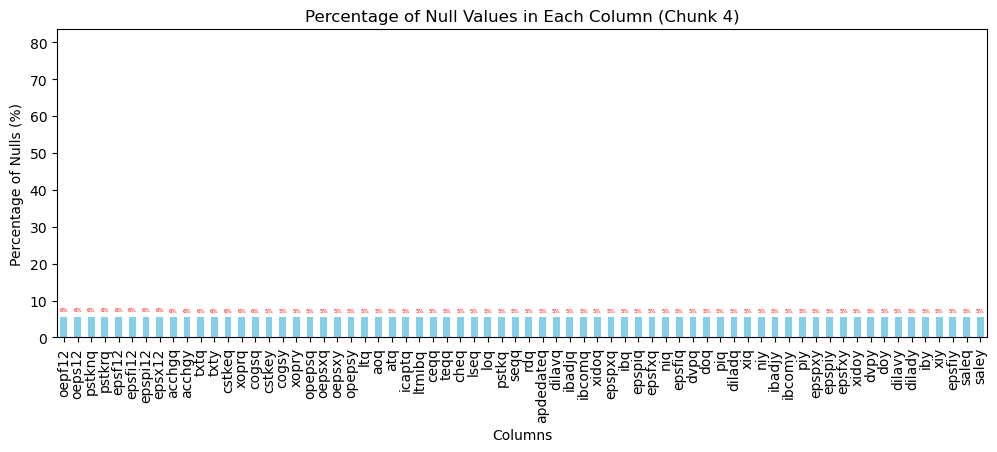

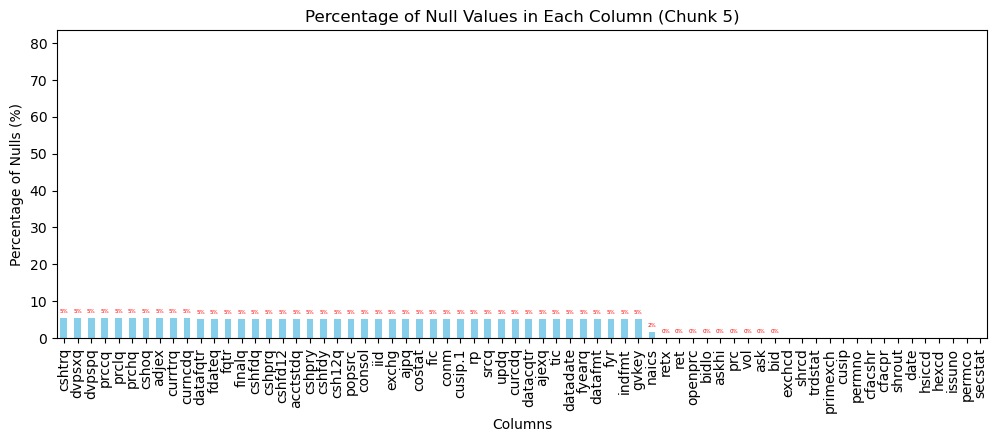

In [95]:
# Count the number of nulls in each column
null_counts = crsp_and_comp_df.isnull().sum()

# Calculate the percentage of nulls in each column
total_rows = len(crsp_and_comp_df)
null_percentages = (null_counts / total_rows) * 100
null_percentages = null_percentages.sort_values(ascending=False)

# Split the columns into 5 chunks
columns = null_percentages.index.tolist()
chunks = np.array_split(columns, 5)

# Plot each chunk separately
for i, chunk in enumerate(chunks):
    # Get the null percentages for the current chunk
    chunk_null_percentages = null_percentages[chunk]
    
    # Plot the percentages as a bar plot
    ax = chunk_null_percentages.plot(kind="bar", figsize=(12, 4), color="skyblue")
    plt.title(f"Percentage of Null Values in Each Column (Chunk {i+1})")
    plt.xlabel("Columns")
    plt.ylim(0, max(null_percentages.values) + 10)
    plt.ylabel("Percentage of Nulls (%)")
    
    # Annotate the bars with the percentage values
    for j, percentage in enumerate(chunk_null_percentages):
        if percentage != 0:
            ax.annotate(
                f"{percentage:.0f}%",
                xy=(j, percentage),
                xytext=(0, 3),
                textcoords="offset points",
                ha="center",
                va="bottom",
                color="red",
                fontsize=4
            )
    
    plt.show()

## Cast date variables

In [96]:
def date_formatting(df):
    """Convert to datetime"""
    date_columns = [
        "nameendt",
        "dclrdt",
        "dlpdt",
        "nextdt",
        "paydt",
        "rcrddt",
        "shrenddt",
        "datadate",
        "apdedateq",
        "fdateq",
        "pdateq",
        "rdq",
        "adjex",
        "ipodate",
    ]
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce")

date_formatting(crsp_and_comp_df)

## A2. Drop all columns containing duplicate information

In [97]:
og_cols = len(crsp_and_comp_df.columns)
columns_to_drop = [
    "permco",       # Dropped CRSP columns that Rachel dropped before
    "issuno",
    # "tsymbol",
    "retx",
    # "vwretx",
    # "ewretx",
    "hexcd",
    # "siccd",
    "hsiccd",
    # "hsicig",
    # "hsicmg",
    "gvkey",        # Used for merging, redundant after join
    "indfmt",       # Standard industrial format, usually constant
    "consol",       # Consolidation level, usually constant
    "popsrc",       # Population source, usually constant
    "datafmt",      # Data format, usually constant
    "exchg",        # Exchange code, CRSP has this information
    "prccq",        # Price data, if using CRSP's pricing information
    "ajexq",        # Adjustment factor, if using CRSP's adjustment factors
    "cusip.1",      # Duplicate of CUSIP
]
crsp_and_comp_df = crsp_and_comp_df.drop(columns=columns_to_drop)
new_cols = len(crsp_and_comp_df.columns)
print("Number of columns removed: ", og_cols - new_cols)
print("Number of columns kept:", new_cols)

Number of columns removed:  14
Number of columns kept: 327


# Take another look at the null analysis

In [98]:
null_table = crsp_and_comp_df.isnull().sum().reset_index()
null_table.columns = ["Column", "Null Values"]

# Add column to show the percentage of null values
null_table["Percentage"] = (null_table["Null Values"] / len(crsp_and_comp_df)) * 100

# Sorting the table by the number of null values in descending order
null_table_sorted = null_table.sort_values(by="Null Values", ascending=False).reset_index(drop=True)
null_table_sorted

,Column,Null Values,Percentage
0,billexceq,608913,73.487587
1,stkcpaq,600028,72.415287
2,stkcpay,599657,72.370512
3,fcaq,595172,71.829233
4,fcay,594986,71.806786
...,...,...,...
322,cfacshr,0,0.000000
323,cfacpr,0,0.000000
324,shrout,0,0.000000
325,date,0,0.000000


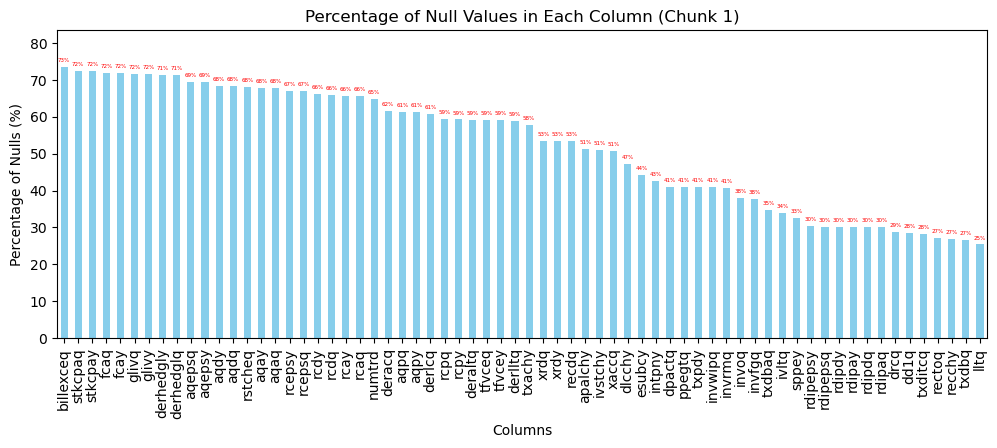

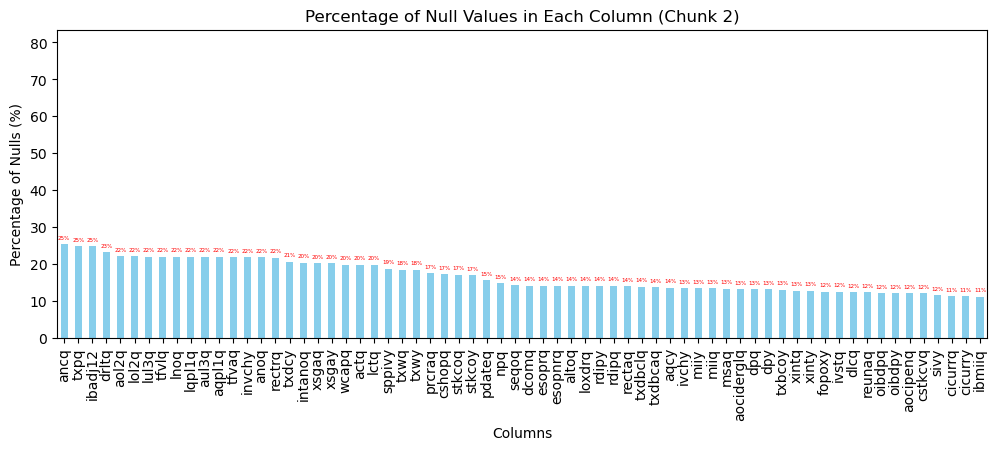

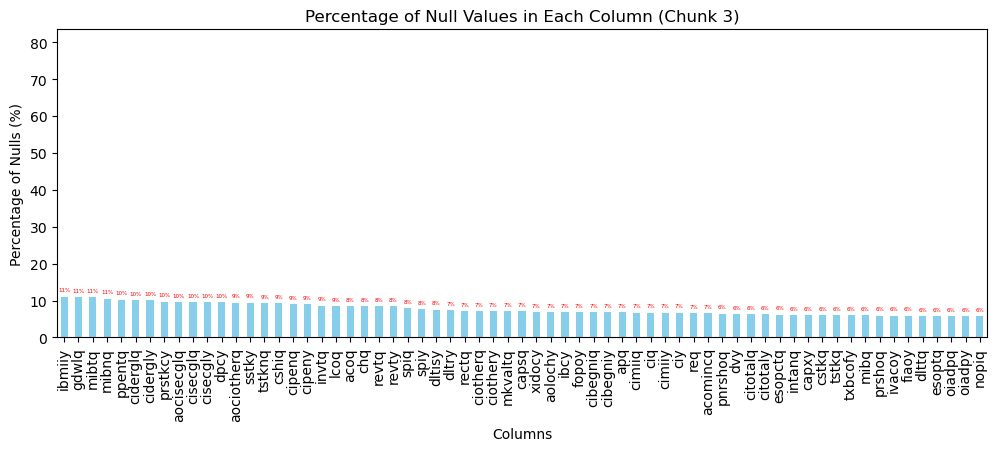

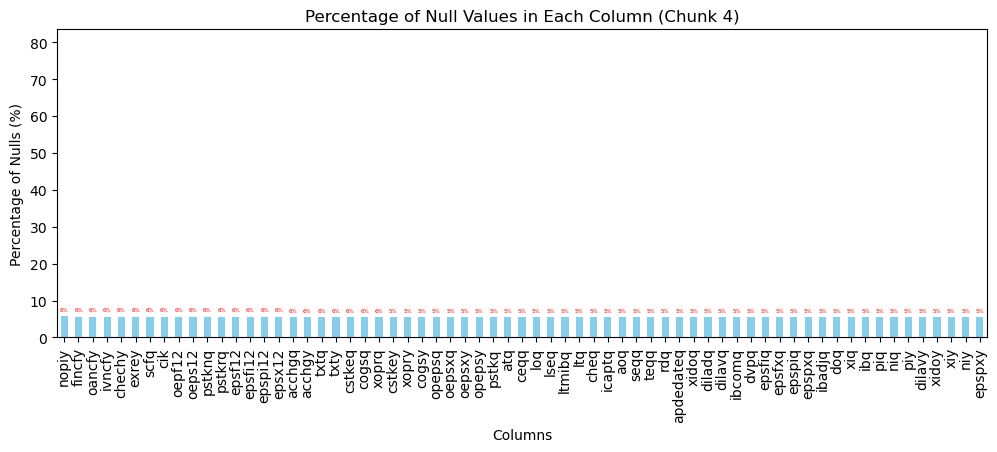

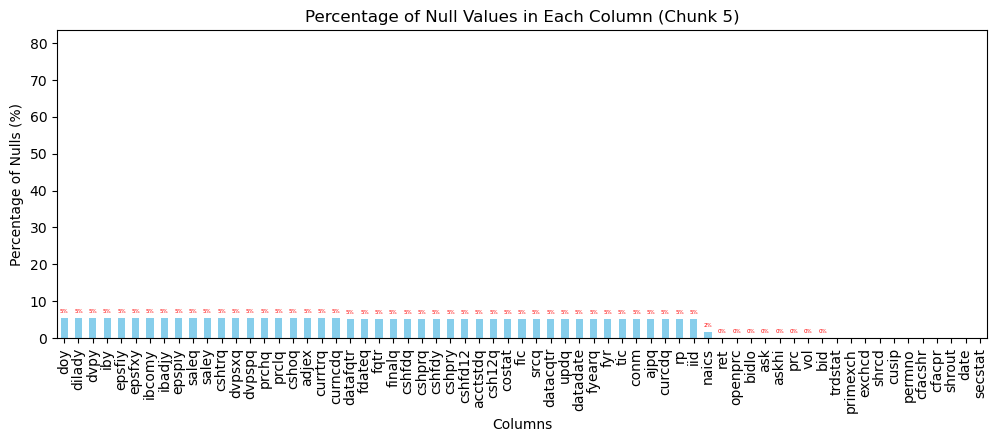

In [99]:
# Count the number of nulls in each column
null_counts = crsp_and_comp_df.isnull().sum()

# Calculate the percentage of nulls in each column
total_rows = len(crsp_and_comp_df)
null_percentages = (null_counts / total_rows) * 100
null_percentages = null_percentages.sort_values(ascending=False)

# Split the columns into 5 chunks
columns = null_percentages.index.tolist()
chunks = np.array_split(columns, 5)

# Plot each chunk separately
for i, chunk in enumerate(chunks):
    # Get the null percentages for the current chunk
    chunk_null_percentages = null_percentages[chunk]
    
    # Plot the percentages as a bar plot
    ax = chunk_null_percentages.plot(kind="bar", figsize=(12, 4), color="skyblue")
    plt.title(f"Percentage of Null Values in Each Column (Chunk {i+1})")
    plt.xlabel("Columns")
    plt.ylim(0, max(null_percentages.values) + 10)
    plt.ylabel("Percentage of Nulls (%)")
    
    # Annotate the bars with the percentage values
    for j, percentage in enumerate(chunk_null_percentages):
        if percentage != 0:
            ax.annotate(
                f"{percentage:.0f}%",
                xy=(j, percentage),
                xytext=(0, 3),
                textcoords="offset points",
                ha="center",
                va="bottom",
                color="red",
                fontsize=4
            )
    
    plt.show()

# Review unique values and distribution in each remaining column

In [100]:
for column in crsp_and_comp_df.columns:
    print("-" * 10, column, "-" * 10)
    print(crsp_and_comp_df[column].nunique())
    print(crsp_and_comp_df[column].value_counts())

---------- cusip ----------
568
cusip
68389X10    1509
67103H10    1509
70339510    1509
46120210    1509
51509810    1509
            ... 
75234430     250
36266G10     249
30219G10     245
12673P10     213
81235010     205
Name: count, Length: 568, dtype: int64
---------- permno ----------
568
permno
10104    1509
79103    1509
78034    1509
78975    1509
78981    1509
         ... 
89454     250
23570     249
77668     245
25778     213
89757     205
Name: count, Length: 568, dtype: int64
---------- date ----------
1509
date
2020-12-15    554
2020-12-09    554
2020-12-10    554
2020-12-11    554
2020-12-14    554
             ... 
2018-01-26    539
2018-01-29    539
2018-01-30    539
2018-01-31    539
2018-01-02    539
Name: count, Length: 1509, dtype: int64
---------- bidlo ----------
137123
bidlo
85.00000     95
68.00000     94
75.50000     94
56.00000     94
75.00000     88
             ..
725.53003     1
731.29498     1
723.73999     1
721.32001     1
239.27010     1
Name: count

# Review shrcd: security type

shrcd is a two-digit code describing the type of shares traded. The first digit describes the type of security traded.

## B1. Fill shrcd na with 00 as undefined

In [22]:
crsp_and_comp_df["shrcd"] = crsp_and_comp_df["shrcd"].fillna("00")

## B2. Split shrcd to two columns [SHRCD_Type, SHRCD_Detail]

In [23]:
crsp_and_comp_df[["SHRCD_Type", "SHRCD_Detail"]] = crsp_and_comp_df["shrcd"].astype(str).str.split("", expand=True).iloc[:, 1:3]

In [24]:
for column in ["SHRCD_Type", "SHRCD_Detail"]:
    print("-" * 10, column, "-" * 10)
    print(crsp_and_comp_df[column].nunique())
    print(crsp_and_comp_df[column].value_counts())

---------- SHRCD_Type ----------
4
SHRCD_Type
1    810123
3     12434
4      4527
7      1509
Name: count, dtype: int64
---------- SHRCD_Detail ----------
3
SHRCD_Detail
1    726980
2     57873
8     43740
Name: count, dtype: int64


## B3. Keep only records where SHRCD_type == 1 (Ordinary Common Shares)

In [25]:
og_len = len(crsp_and_comp_df)
crsp_and_comp_df = crsp_and_comp_df[crsp_and_comp_df["SHRCD_Type"] == "1"]
new_len = len(crsp_and_comp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_records_removed:  18470
num_records_kept:  810123


# Review exchcd: Listed Exchange

EXCHCD is a code indicating the exchange on which a security is listed.

## C1. Fill exchcd na with 0 as "not listed in any exchange"

In [26]:
# crsp_and_comp_df["exchcd"] = pd.to_numeric(crsp_and_comp_df["exchcd"], errors="coerce").fillna(0).astype(int)

In [27]:
crsp_and_comp_df.loc[:, "exchcd"] = pd.to_numeric(crsp_and_comp_df["exchcd"], errors="coerce").fillna(0).astype(int)

## C2. Remove all records where exchcd < 0 (Halted, Suspended, or Not Trading)

In [28]:
og_len = len(crsp_and_comp_df)
crsp_and_comp_df = crsp_and_comp_df[crsp_and_comp_df["exchcd"] > 0]
new_len = len(crsp_and_comp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

crsp_and_comp_df["exchcd"] = crsp_and_comp_df["exchcd"].astype(str)

num_records_removed:  256
num_records_kept:  809867


# Review primexch: Primary Exchange

Primary Exchange is a one-character code which identifies the primary exchange on which the security trades.

https://www.crsp.org/wp-content/uploads/appendix/FlagType_EC.html

In [29]:
if 'primexch' in crsp_and_comp_df.columns:
    print("'primexch' column exists in the DataFrame")
else:
    print("'primexch' column does not exist in the DataFrame")

'primexch' column exists in the DataFrame


## D1. Fill primexch na with X as "Unknown"

In [30]:
crsp_and_comp_df["primexch"] = crsp_and_comp_df["primexch"].fillna("X")

# Review trdstat: Trading Status

Trading Status is a one-character field containing the trading status of securities.

## E1. Fill trdstat na with X as "Unknown"

In [31]:
crsp_and_comp_df["trdstat"] = crsp_and_comp_df["trdstat"].fillna("X")

## E2. Keep only records where trdstat == A (Active trading status)

In [32]:
og_len = len(crsp_and_comp_df)
crsp_and_comp_df = crsp_and_comp_df[crsp_and_comp_df["trdstat"] == "A"]
new_len = len(crsp_and_comp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_records_removed:  0
num_records_kept:  809867


# Review secstat: Security Status

Security Status is a one-character code that describes the status of a security.

## E1a. Fill secstat na with X as "Unknown"

In [33]:
crsp_and_comp_df["secstat"] = crsp_and_comp_df["secstat"].fillna("X")

## E2b. Keep only records where secstat == R (Regular Way)

In [34]:
og_len = len(crsp_and_comp_df)
crsp_and_comp_df = crsp_and_comp_df[crsp_and_comp_df["secstat"] == "R"]
new_len = len(crsp_and_comp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_records_removed:  0
num_records_kept:  809867


In [35]:
null_table = crsp_and_comp_df.isnull().sum().reset_index()
null_table.columns = ["Column", "Null Values"]

# Add column to show the percentage of null values
null_table["Percentage"] = (null_table["Null Values"] / len(crsp_and_comp_df)) * 100

# Sorting the table by the number of null values in descending order
null_table_sorted = null_table.sort_values(by="Null Values", ascending=False).reset_index(drop=True)
null_table_sorted

,Column,Null Values,Percentage
0,optvolq,644212,79.545407
1,spidy,641027,79.152132
2,spidq,640774,79.120893
3,optdry,640618,79.101630
4,setd12,640171,79.046436
...,...,...,...
347,cfacshr,0,0.000000
348,cfacpr,0,0.000000
349,shrout,0,0.000000
350,date,0,0.000000


# Review naics: North American Industry Classification System Code

North American Industry Classification System Code (NAICS) is an 6-character code used to group companies with similar products or services.

NAICS is a hierachical code, containing up to six digits: The first two fields, NAICS sectors, designate general categories of economic activity, the third field, sub-sector, further defines the sector, the fourth field is the industry group, the fifth field is the NAICS industry, and the sixth field represents the national industry (a zero in the 6th digit generally indicates that the NAICS industry and teh country industry are the same).


## F1. Fill naics na with 999999 as "Unknown"

In [36]:
crsp_and_comp_df["naics"] = crsp_and_comp_df["naics"].fillna("999999")

## F2. Split naics to two columns ['NAICS_Sector', 'NAICS_Secondary']

In [37]:
crsp_and_comp_df["NAICS_Sector"] = crsp_and_comp_df["naics"].astype(str).str[:2]
crsp_and_comp_df["NAICS_Secondary"] = crsp_and_comp_df["naics"].astype(str).str[2:]

In [38]:
for column in ["NAICS_Sector", "NAICS_Secondary"]:
    print("-" * 10, column, "-" * 10)
    print(crsp_and_comp_df[column].nunique())
    print(crsp_and_comp_df[column].value_counts())

---------- NAICS_Sector ----------
22
NAICS_Sector
33    181240
52    104121
51     92319
32     81278
22     44241
53     43740
31     43631
48     33853
21     27162
54     25260
45     22840
42     19617
99     18243
72     16599
56     15090
44     12317
62     10563
23      7545
71      4527
49      3018
81      1509
11      1154
Name: count, dtype: int64
---------- NAICS_Secondary ----------
170
NAICS_Secondary
11.0      33198
2110.0    31689
3210.0    28671
1120.0    28650
4413.0    28155
          ...  
5310.0     1169
6112.0     1148
9920.0     1073
3921.0      942
9990.0      213
Name: count, Length: 170, dtype: int64


## F3. Clean-up the NAICS sector column to readable format

https://www.census.gov/naics/reference_files_tools/2022_NAICS_Manual.pdf

In [39]:
sector_dict = {
    "10": "Metal Mining",
    "11": "Agriculture, Forestry, Fishing and Hunting",
    "21": "Mining, Quarrying, and Oil and Gas Extraction",
    "22": "Utilities",
    "23": "Construction",
    "31": "Manufacturing",
    "32": "Manufacturing",
    "33": "Manufacturing",
    "42": "Wholesale Trade",
    "44": "Retail Trade",
    "45": "Retail Trade",
    "48": "Transportation and Warehousing",
    "49": "Transportation and Warehousing",
    "51": "Information",
    "52": "Finance and Insurance",
    "53": "Real Estate and Rental and Leasing",
    "54": "Professional, Scientific, and Technical Services",
    "55": "Management of Companies and Enterprises",
    "56": "Administrative and Support and Waste Management and Remediation Services",
    "61": "Educational Services",
    "62": "Health Care and Social Assistance",
    "67": "Holding And Other Investment Offices",
    "71": "Arts, Entertainment, and Recreation",
    "72": "Accommodation and Food Services",
    "73": "Business Services",
    "81": "Other Services (except Public Administration)",
    "92": "Public Administration",
    "99": "Unknown",
}

crsp_and_comp_df["NAICS_Sector_Name"] = crsp_and_comp_df["NAICS_Sector"].replace(sector_dict)

In [40]:
print(crsp_and_comp_df["NAICS_Sector"].value_counts())

NAICS_Sector
33    181240
52    104121
51     92319
32     81278
22     44241
53     43740
31     43631
48     33853
21     27162
54     25260
45     22840
42     19617
99     18243
72     16599
56     15090
44     12317
62     10563
23      7545
71      4527
49      3018
81      1509
11      1154
Name: count, dtype: int64


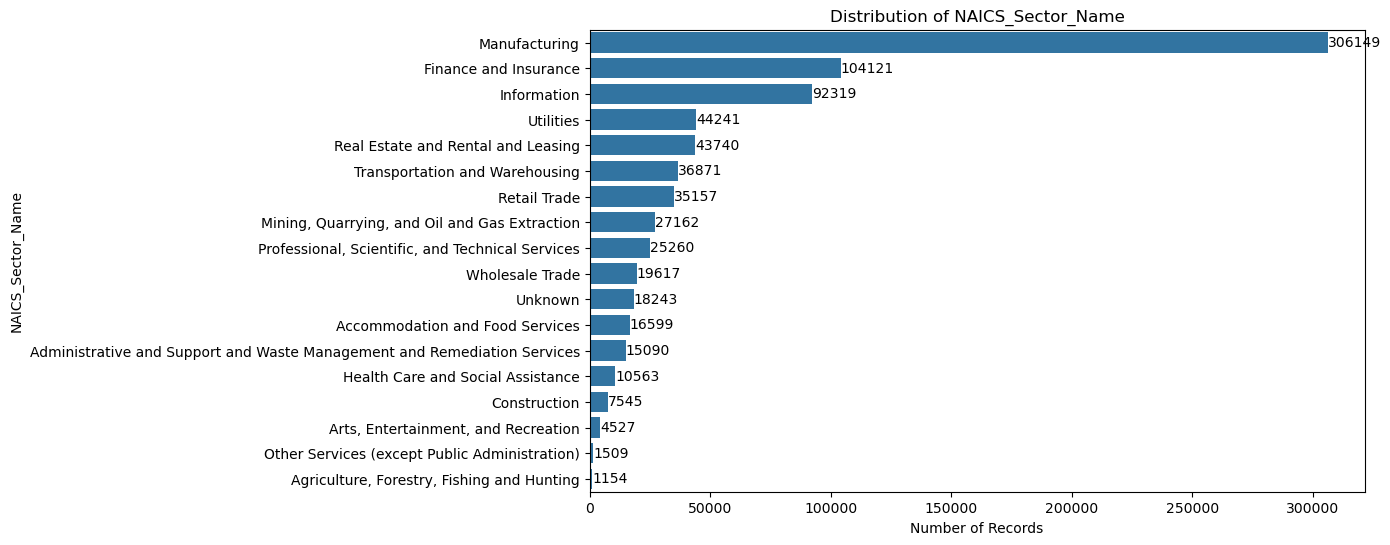

In [41]:
# Calculate the category counts and sort them in descending order
category_counts = crsp_and_comp_df["NAICS_Sector_Name"].value_counts().sort_values(ascending=False)

# Plot the counts distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=crsp_and_comp_df, y="NAICS_Sector_Name", order=category_counts.index)
plt.title("Distribution of NAICS_Sector_Name")
plt.xlabel("Number of Records")
plt.ylabel("NAICS_Sector_Name")

# Annotate the bars with the count values
for i, count in enumerate(category_counts):
    plt.text(count, i, f"{count}", ha="left", va="center", color="black")

plt.show()

# Review numtrd: Number of Trades

Daily: Number of Trades, Nasdaq contains the number of trades made on the Nasdaq Stock Market each date for a security. Trades on all exchanges are connected to Nasdaqs composite pricing network and all paper trades are included in the count. If the number of trades is unavailable, the field is set to 99.

## G1. Fill numtrd na with 99 as "Unknown"

In [42]:
crsp_and_comp_df["numtrd"] = crsp_and_comp_df["numtrd"].fillna("99")

# Review atq: Total Assets
Current assets plus net property, plant, and equipment plus other noncurrent assets, including intangible assets, deferred items and investments and advances. This item is a summary of:
    
    Current Assets - Total (ACT)
    Property, Plant and Equipment (Net) - Total (PPENT)
    Investment & Advances - Equity (IVAEQ)
    Investment & Advances - Other (IVAO)
    Intangible Assets - Total (INTAN)
    Assets - Other - Total (AO)

In [120]:
negative_atq = crsp_and_comp_df[crsp_and_comp_df['atq'] < 0]
print(f"Number of negative atq values: {len(negative_atq)}")

Number of negative atq values: 0


In [121]:
crsp_and_comp_df['atq'].describe()

count    7.832340e+05
mean     7.440727e+04
std      2.502455e+05
min      3.830000e-01
25%      8.749500e+03
50%      2.044010e+04
75%      5.087600e+04
max      3.954687e+06
Name: atq, dtype: float64

In [123]:
zero_atq = crsp_and_comp_df[crsp_and_comp_df["atq"] == 0]
print(f"Zero atq values: {len(zero_atq)}")

Zero atq values: 0


In [124]:
missing_atq = crsp_and_comp_df['atq'].isnull().sum()
print(f"Number of missing atq values: {missing_atq}")

Number of missing atq values: 45359


Note: No change made. Add to columns to forward fill. Could be worth taking a log transformation to normalize

# Review ltq: Total Liabilities

This item is a component of Assets - Total/Liabilities and Shareholders' Equity - Total (LSE).

This item is the sum of:

    Current Liabilities - Total (LCT)
    Deferred Taxes and Investment Tax Credit (TXDITC)
    Liabilities - Other (LO)
    Long-Term Debt - Total (DLTT)

In [102]:
column = "ltq"

print("-" * 10, column, "-" * 10)
print(crsp_and_comp_df[column].nunique())
print(crsp_and_comp_df[column].value_counts())

---------- ltq ----------
12209
ltq
14244.000    255
61055.000    252
7725.000     199
6166.000     190
19878.000    190
            ... 
0.359          8
202.452        7
200.230        7
462.000        2
411.120        1
Name: count, Length: 12209, dtype: int64


In [136]:
negative_ltq = crsp_and_comp_df[crsp_and_comp_df['ltq'] < 0]
print(f"Number of negative ltq values: {len(negative_ltq)}")

Number of negative ltq values: 0


In [137]:
zero_ltq = crsp_and_comp_df[crsp_and_comp_df["ltq"] == 0]
print(f"Zero ltq values: {len(zero_ltq)}")

Zero ltq values: 0


In [138]:
missing_ltq = crsp_and_comp_df['ltq'].isnull().sum()
print(f"Number of missing atq values: {missing_ltq}")

Number of missing atq values: 45359


Note: No change made. Add to columns to forward fill. Could be worth taking a log transformation to normalize

# Review seqq: Stockholders Equity
This item represents the common and preferred shareholders' interest in the company.

This item includes:

    Capital surplus
    Common/Ordinary Stock (Capital)
    Nonredeemable preferred stock
    Redeemable preferred stock
    Retained earnings
    Treasury Stock - Total Dollar Amount (reduces Stockholder's Equity)

In [139]:
column = "seqq"

print("-" * 10, column, "-" * 10)
print(crsp_and_comp_df[column].nunique())
print(crsp_and_comp_df[column].value_counts())

---------- seqq ----------
12034
seqq
3542.000    253
7758.000    251
5558.000    192
3257.000    191
4764.000    191
           ... 
0.024         8
61.529        7
152.113       7
402.500       2
208.853       1
Name: count, Length: 12034, dtype: int64


In [140]:
crsp_and_comp_df['seqq'].describe()

count    783234.000000
mean      15949.564060
std       35142.143412
min      -18316.000000
25%        2678.000000
50%        6425.274000
75%       14861.000000
max      539883.000000
Name: seqq, dtype: float64

In [135]:
negative_seqq = crsp_and_comp_df[crsp_and_comp_df['seqq'] < 0]
print(f"Number of negative atq values: {len(negative_seqq)}")

Number of negative atq values: 42868


In [141]:
zero_seqq = crsp_and_comp_df[crsp_and_comp_df["seqq"] == 0]
print(f"Zero seqq values: {len(zero_seqq)}")

Zero seqq values: 0


In [145]:
missing_seqq = crsp_and_comp_df['seqq'].isnull().sum()
print(f"Number of missing seqq values: {missing_seqq}")

Number of missing seqq values: 45359


Note: No change made. Add to columns to forward fill. Could be worth taking a log transformation to normalize

# Review revtq: Revenue - Total
This item represents the gross income received from all divisions of the company.

This item is a component of Pretax Income (PI).

This item is the sum of:

    Commissions and Fees (Broker/Dealer) (CFBD)
    Commissions and Fees (Real Estate) (CFERE)
    Commissions and Fees - Other (CFO)
    Development Revenue (Real Estate) (DVRRE)
    Income - Other (Broker/Dealer) (IOBD)
    Income - Other (Insurance) (IOI)
    Income - Other (Real Estate) (IORE)
    Insurance Premiums - Total (Insurance) (IPTI)
    Interest and Related Income - Total (IDIT)
    Investment Banking Income (IBKI)
    Investment Income (Real Estate) (IIRE)
    Investment Income - Total (Insurance) (IVI)
    Investment Securities - Gain (Loss) - Total (ISGT)
    Principal Transactions (PTRAN)
    Revenue/Income - Sundry (RIS)
    Trading/Dealing Securities - Gain (Loss) (TDSG)

In [104]:
column = "revtq"

print("-" * 10, column, "-" * 10)
print(crsp_and_comp_df[column].nunique())
print(crsp_and_comp_df[column].value_counts())

---------- revtq ----------
10825
revtq
3562.000    385
1953.000    381
3207.000    376
3013.000    319
1874.000    318
           ... 
41.757       15
83.222        7
105.800       7
223.400       2
148.874       1
Name: count, Length: 10825, dtype: int64


In [143]:
crsp_and_comp_df['revtq'].describe()

count    758907.000000
mean       6463.255282
std       13236.762266
min       -9010.000000
25%        1078.012000
50%        2500.000000
75%        5452.000000
max      164048.000000
Name: revtq, dtype: float64

In [149]:
negative_revtq = crsp_and_comp_df[crsp_and_comp_df['revtq'] < 0]
print(f"Number of negative revtq values: {len(negative_revtq)}")
print("\nSample of negative revtq values:")
print(negative_revtq[['permno', 'date', 'revtq']].head())

Number of negative revtq values: 380

Sample of negative revtq values:
        permno       date  revtq
238939   23473 2020-03-31  -99.0
238940   23473 2020-04-01  -99.0
238941   23473 2020-04-02  -99.0
238942   23473 2020-04-03  -99.0
238943   23473 2020-04-06  -99.0


In [154]:
print("\nCompanies with negative revtq:")
print(negative_revtq['permno'].value_counts())

print("\nQuarters with negative revtq:")
negative_revtq['quarter'] = pd.PeriodIndex(negative_revtq['date'], freq='Q')
print(negative_revtq['quarter'].value_counts())


Companies with negative revtq:
permno
24328    190
79145     64
23473     63
83443     63
Name: count, dtype: int64

Quarters with negative revtq:
quarter
2020Q2    124
2021Q3     64
2021Q4     63
2020Q4     63
2022Q2     61
2020Q1      2
2021Q2      1
2022Q1      1
2020Q3      1
Freq: Q-DEC, Name: count, dtype: int64


/tmp/ipykernel_561/3841783118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_revtq['quarter'] = pd.PeriodIndex(negative_revtq['date'], freq='Q')


In [160]:
if not all_same:
    # If not all the same, let's see what other values exist
    unique_negative_values = negative_revtq['revtq'].unique()
    print("\nUnique negative revtq values:")
    print(unique_negative_values)

    # Check if there are any patterns by company
    print("\nNegative revtq values by company:")
    company_negative_values = negative_revtq.groupby('permno')['revtq'].unique()
    for permno, values in company_negative_values.items():
        print(f"Company {permno}: {values}")

# Check how many companies have negative revtq values
companies_with_negative = negative_revtq['permno'].nunique()
print(f"\nNumber of companies with negative revtq: {companies_with_negative}")


Unique negative revtq values:
[  -99.     -260.116 -1464.838  -579.11    -33.688 -9010.   ]

Negative revtq values by company:
Company 23473: [-99.]
Company 24328: [ -260.116 -1464.838  -579.11 ]
Company 79145: [-33.688]
Company 83443: [-9010.]

Number of companies with negative revtq: 4


| company_permno | company_name                |
|----------------|-----------------------------|
| 23473          | CINCINNATI FINANCIAL CORP   |
| 24328          | EQT CORP                    |
| 79145          | unknown                     |
| 83443          | BERKSHIRE HATHAWAY INC DEL  |

## Prep companies with negative values for forwardfill

In [162]:
company_to_clean = 23473  # This is the company with -99.0 values
companies_to_drop = [24328, 79145, 83443]  # These are the companies with other negative revenues

# Replace -99.0 with NaN for company 23473
crsp_and_comp_df.loc[(crsp_and_comp_df['permno'] == company_to_clean) & (crsp_and_comp_df['revtq'] == -99.0), 'revtq'] = np.nan

# Drop the other companies with negative revenues
crsp_and_comp_df = crsp_and_comp_df[~crsp_and_comp_df['permno'].isin(companies_to_drop)]

# Check if any negative revtq values remain
remaining_negatives = crsp_and_comp_df[crsp_and_comp_df['revtq'] < 0]
print(f"Remaining negative revtq values: {len(remaining_negatives)}")

Remaining negative revtq values: 0


# Review niq: Net Income

This item represents the income or loss reported by a company after expenses and losses have been subtracted from all revenues and gains for the fiscal period including extraordinary items and discontinued operations.

In [105]:
column = "niq"

print("-" * 10, column, "-" * 10)
print(crsp_and_comp_df[column].nunique())
print(crsp_and_comp_df[column].value_counts())

---------- niq ----------
8659
niq
 165.000    876
 162.000    821
 264.000    763
 207.000    763
 217.000    755
           ... 
-80.331      15
-3.949        7
 5.697        7
-47.400       2
-6.352        1
Name: count, Length: 8659, dtype: int64


In [163]:
crsp_and_comp_df['niq'].describe()

count    779051.000000
mean        637.418233
std        1803.309532
min      -22854.000000
25%          97.100000
50%         253.000000
75%         652.435000
max       34630.000000
Name: niq, dtype: float64

In [172]:
# Count of negative, zero, and positive values
neg_count = (crsp_and_comp_df['niq'] < 0).sum() # negative values are okay here
zero_count = (crsp_and_comp_df['niq'] == 0).sum()
pos_count = (crsp_and_comp_df['niq'] > 0).sum()

print(f"\nNegative count: {neg_count}")
print(f"Zero count: {zero_count}")
print(f"Positive count: {pos_count}")


Negative count: 88440
Zero count: 127
Positive count: 690484


In [166]:
# Check for any extreme values
q1 = crsp_and_comp_df['niq'].quantile(0.25)
q3 = crsp_and_comp_df['niq'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

extreme_low = crsp_and_comp_df[crsp_and_comp_df['niq'] < lower_bound]
extreme_high = crsp_and_comp_df[crsp_and_comp_df['niq'] > upper_bound]

print(f"\nNumber of extreme low values: {len(extreme_low)}")
print(f"Number of extreme high values: {len(extreme_high)}")


Number of extreme low values: 17383
Number of extreme high values: 86849


Note: No change made. Add to columns to forward fill. Could be worth taking a log transformation to normalize

# Review cheq: Cash and Short-Term Investments

This item represents cash and all securities readily transferable to cash as listed in the Current Asset section.

In [106]:
column = "cheq"

print("-" * 10, column, "-" * 10)
print(crsp_and_comp_df[column].nunique())
print(crsp_and_comp_df[column].value_counts())

---------- cheq ----------
10780
cheq
742.000     443
68.000      440
334.000     437
1574.000    380
99.000      378
           ... 
0.172         8
176.601       7
55.487        7
378.100       2
257.436       1
Name: count, Length: 10780, dtype: int64


In [168]:
crsp_and_comp_df['cheq'].describe()

count    7.788900e+05
mean     1.042303e+04
std      5.463761e+04
min      1.720000e-01
25%      4.850000e+02
50%      1.440250e+03
75%      4.305000e+03
max      1.056407e+06
Name: cheq, dtype: float64

In [171]:
# Count of negative, zero, and positive values
neg_count = (crsp_and_comp_df['cheq'] < 0).sum()
zero_count = (crsp_and_comp_df['cheq'] == 0).sum()
pos_count = (crsp_and_comp_df['cheq'] > 0).sum()

print(f"\nNegative count: {neg_count}")
print(f"Zero count: {zero_count}")
print(f"Positive count: {pos_count}")


Negative count: 0
Zero count: 0
Positive count: 778890


In [173]:
# Check for any extreme values
q1 = crsp_and_comp_df['cheq'].quantile(0.25)
q3 = crsp_and_comp_df['cheq'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

extreme_low = crsp_and_comp_df[crsp_and_comp_df['cheq'] < lower_bound]
extreme_high = crsp_and_comp_df[crsp_and_comp_df['cheq'] > upper_bound]

print(f"\nNumber of extreme low values: {len(extreme_low)}")
print(f"Number of extreme high values: {len(extreme_high)}")


Number of extreme low values: 0
Number of extreme high values: 96670


In [181]:
# Check for missing values
missing_count = crsp_and_comp_df['cheq'].isnull().sum()
print(f"\nNumber of missing cheq values: {missing_count}")


Number of missing cheq values: 45176


Note: No change made. Add to columns to forward fill.

# Review dlttq: Long-Term Debt
The item represents debt obligations due more than one year from the company's balance sheet date

In [107]:
column = "dlttq"

print("-" * 10, column, "-" * 10)
print(crsp_and_comp_df[column].nunique())
print(crsp_and_comp_df[column].value_counts())

---------- dlttq ----------
11612
dlttq
0.000        9996
29.000        317
845.000       314
8261.000      254
20015.000     253
             ... 
26.892         15
595.000        15
38.737          7
14.858          7
147.100         2
Name: count, Length: 11612, dtype: int64


In [169]:
crsp_and_comp_df['dlttq'].describe()

count    775983.000000
mean      14113.678662
std       30260.184564
min           0.000000
25%        2323.939000
50%        5894.000000
75%       13482.786000
max      372834.000000
Name: dlttq, dtype: float64

In [170]:
# Count of negative, zero, and positive values
neg_count = (crsp_and_comp_df['dlttq'] < 0).sum()
zero_count = (crsp_and_comp_df['dlttq'] == 0).sum()
pos_count = (crsp_and_comp_df['dlttq'] > 0).sum()

print(f"\nNegative count: {neg_count}")
print(f"Zero count: {zero_count}")
print(f"Positive count: {pos_count}")


Negative count: 0
Zero count: 9996
Positive count: 765987


In [174]:
# Check for any extreme values
q1 = crsp_and_comp_df['dlttq'].quantile(0.25)
q3 = crsp_and_comp_df['dlttq'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

extreme_low = crsp_and_comp_df[crsp_and_comp_df['dlttq'] < lower_bound]
extreme_high = crsp_and_comp_df[crsp_and_comp_df['dlttq'] > upper_bound]

print(f"\nNumber of extreme low values: {len(extreme_low)}")
print(f"Number of extreme high values: {len(extreme_high)}")


Number of extreme low values: 0
Number of extreme high values: 78601


In [180]:
# Check for missing values
missing_count = crsp_and_comp_df['dlttq'].isnull().sum()
print(f"\nNumber of missing dlttq values: {missing_count}")


Number of missing dlttq values: 48083


Note: No change made. Add to columns to forward fill.

# Review epspxq: Earnings Per Share (Basic) - Excluding Extraordinary Items
This item represents basic earnings per share before extraordinary items and discontinued operations

In [108]:
column = "epspxq"

print("-" * 10, column, "-" * 10)
print(crsp_and_comp_df[column].nunique())
print(crsp_and_comp_df[column].value_counts())

---------- epspxq ----------
1320
epspxq
 0.74     4463
 0.94     4462
 0.75     4328
 0.48     4284
 0.70     4267
          ... 
 28.37      60
 13.71      59
-7.11       47
-1.40       35
 33.51      21
Name: count, Length: 1320, dtype: int64


In [175]:
crsp_and_comp_df['epspxq'].describe()

count    779051.000000
mean          1.538107
std           5.042264
min        -112.500000
25%           0.400000
50%           0.970000
75%           1.850000
max         141.820000
Name: epspxq, dtype: float64

In [177]:
# Count of negative, zero, and positive values
neg_count = (crsp_and_comp_df['epspxq'] < 0).sum() # Negative values okay
zero_count = (crsp_and_comp_df['epspxq'] == 0).sum()
pos_count = (crsp_and_comp_df['epspxq'] > 0).sum()

print(f"\nNegative count: {neg_count}")
print(f"Zero count: {zero_count}")
print(f"Positive count: {pos_count}")


Negative count: 87517
Zero count: 1939
Positive count: 689595


In [178]:
# Check for any extreme values
q1 = crsp_and_comp_df['epspxq'].quantile(0.25)
q3 = crsp_and_comp_df['epspxq'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

extreme_low = crsp_and_comp_df[crsp_and_comp_df['epspxq'] < lower_bound]
extreme_high = crsp_and_comp_df[crsp_and_comp_df['epspxq'] > upper_bound]

print(f"\nNumber of extreme low values: {len(extreme_low)}")
print(f"Number of extreme high values: {len(extreme_high)}")


Number of extreme low values: 17174
Number of extreme high values: 52930


In [179]:
# Check for missing values
missing_count = crsp_and_comp_df['epspxq'].isnull().sum()
print(f"\nNumber of missing epspxq values: {missing_count}")


Number of missing epspxq values: 45015


# Review epsfxq: Earnings Per Share (Diluted) - Excluding Extraordinary Items
This item represents basic earnings per share for common shares after allowing for the conversion of convertible senior stock and debt, and the exercise of warrants, options and agreements for issuance of common shares upon satisfaction of certain conditions.

In [109]:
column = "epsfxq"

print("-" * 10, column, "-" * 10)
print(crsp_and_comp_df[column].nunique())
print(crsp_and_comp_df[column].value_counts())

---------- epsfxq ----------
1304
epsfxq
 0.68     4576
 0.48     4277
 0.92     4226
 0.70     4198
 0.97     4121
          ... 
 13.47      59
-7.11       47
 8.26       42
-1.40       35
 32.55      21
Name: count, Length: 1304, dtype: int64


# Review all remaining value related columns.

## H1. Drop all permno with less than 128 days of return

In [43]:
og_permno = crsp_and_comp_df['permno'].nunique()
permno_counts = crsp_and_comp_df['permno'].value_counts()
permno_to_keep = permno_counts[permno_counts >= 128].index
crsp_and_comp_df = crsp_and_comp_df[crsp_and_comp_df['permno'].isin(permno_to_keep)].reset_index(drop=True)

assert crsp_and_comp_df["permno"].value_counts().min() >= 128

new_permno = crsp_and_comp_df['permno'].nunique()
print("num_PERMNO_og: ", og_permno)
print("num_PERMNO_removed: ", og_permno - new_permno)
print("num_PERMNO_kept: ", new_permno)

num_PERMNO_og:  554
num_PERMNO_removed:  0
num_PERMNO_kept:  554


## H2. Forward fill trading values

In [128]:
fill_cols = [
    # Existing CRSP columns
    "vol", "shrout", "askhi", "ask", "bidlo", "bid", 
    "openprc", "prc", "cfacpr", "cfacshr",

    # "vwretd", "ewretd", "sprtrn", - Missing in joined dataset

    # Additional Compustat columns
    "atq", "ltq", "revtq", "seqq",  "dlttq", "cheq",
    # "ceqq", "dlcq", "invtq", "ppentq",
    # "saleq", "cogsq", "xsgaq", "oiadpq", "niq",
    # "capxy", "oancfy", "cshoq", "mkvaltq",
    # "epsfxq"
]

# Convert the specified columns to numeric, coercing errors to NaN
crsp_and_comp_df[fill_cols] = crsp_and_comp_df[fill_cols].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [45]:
print("before forward fill")
for col in fill_cols:
  print(f"number of nulls in column {col}: ", len(crsp_and_comp_df[crsp_and_comp_df[col].isnull()]))

before forward fill
number of nulls in column vol:  1
number of nulls in column shrout:  0
number of nulls in column askhi:  1
number of nulls in column ask:  1
number of nulls in column bidlo:  1
number of nulls in column bid:  1
number of nulls in column openprc:  2
number of nulls in column prc:  1
number of nulls in column cfacpr:  0
number of nulls in column cfacshr:  0
number of nulls in column atq:  43578
number of nulls in column ltq:  43578
number of nulls in column ceqq:  43578
number of nulls in column seqq:  43578
number of nulls in column cheq:  43578
number of nulls in column dlcq:  96973
number of nulls in column dlttq:  45976
number of nulls in column invtq:  69173
number of nulls in column ppentq:  78910
number of nulls in column revtq:  68097
number of nulls in column saleq:  43481
number of nulls in column cogsq:  43859
number of nulls in column xsgaq:  165451
number of nulls in column oiadpq:  46391
number of nulls in column niq:  43481
number of nulls in column cap

In [46]:
# pick an example for visual inspection
review_idx = crsp_and_comp_df[crsp_and_comp_df["prc"].isnull()].index[0]
crsp_and_comp_df[crsp_and_comp_df["prc"].isnull()].iloc[0]

cusip                           09062X10
permno                             76841
date                 2020-11-06 00:00:00
bidlo                                NaN
askhi                                NaN
                            ...         
SHRCD_Type                             1
SHRCD_Detail                           1
NAICS_Sector                          32
NAICS_Secondary                   5414.0
NAICS_Sector_Name          Manufacturing
Name: 504809, Length: 355, dtype: object

In [47]:
# forward fill
for col in fill_cols:
  crsp_and_comp_df[col] = crsp_and_comp_df.groupby('permno')[col].ffill()

In [48]:
# visually inspect the example to ensure the price was forward filled correctly
crsp_and_comp_df.iloc[review_idx-1 : review_idx+1]["prc"]

504808    328.89999
504809    328.89999
Name: prc, dtype: float64

In [49]:
print("after forward fill")
for col in fill_cols:
  print(f"number of nulls in column {col}: ", len(crsp_and_comp_df[crsp_and_comp_df[col].isnull()]))

after forward fill
number of nulls in column vol:  0
number of nulls in column shrout:  0
number of nulls in column askhi:  0
number of nulls in column ask:  0
number of nulls in column bidlo:  0
number of nulls in column bid:  0
number of nulls in column openprc:  0
number of nulls in column prc:  0
number of nulls in column cfacpr:  0
number of nulls in column cfacshr:  0
number of nulls in column atq:  42899
number of nulls in column ltq:  42899
number of nulls in column ceqq:  42899
number of nulls in column seqq:  42899
number of nulls in column cheq:  42899
number of nulls in column dlcq:  51411
number of nulls in column dlttq:  43340
number of nulls in column invtq:  57173
number of nulls in column ppentq:  68084
number of nulls in column revtq:  67465
number of nulls in column saleq:  42849
number of nulls in column cogsq:  42849
number of nulls in column xsgaq:  163637
number of nulls in column oiadpq:  43416
number of nulls in column niq:  42849
number of nulls in column capx

## H3. If prc is still NaN, that means it was the first day the stock was listed on the exchange, drop these records since we cannot calculate the return for these days

In [50]:
crsp_and_comp_df.dropna(subset=["prc"], inplace=True)
crsp_and_comp_df.reset_index(drop=True, inplace=True)

In [51]:
print("after forward fill")
for col in fill_cols:
  print(f"number of nulls in column {col}: ", len(crsp_and_comp_df[crsp_and_comp_df[col].isnull()]))

after forward fill
number of nulls in column vol:  0
number of nulls in column shrout:  0
number of nulls in column askhi:  0
number of nulls in column ask:  0
number of nulls in column bidlo:  0
number of nulls in column bid:  0
number of nulls in column openprc:  0
number of nulls in column prc:  0
number of nulls in column cfacpr:  0
number of nulls in column cfacshr:  0
number of nulls in column atq:  42899
number of nulls in column ltq:  42899
number of nulls in column ceqq:  42899
number of nulls in column seqq:  42899
number of nulls in column cheq:  42899
number of nulls in column dlcq:  51411
number of nulls in column dlttq:  43340
number of nulls in column invtq:  57173
number of nulls in column ppentq:  68084
number of nulls in column revtq:  67465
number of nulls in column saleq:  42849
number of nulls in column cogsq:  42849
number of nulls in column xsgaq:  163637
number of nulls in column oiadpq:  43416
number of nulls in column niq:  42849
number of nulls in column capx

## H4. If ask, bid, openprc are still NaN, fill them with 0

In [52]:
crsp_and_comp_df["ask"] = crsp_and_comp_df["ask"].fillna(0)
crsp_and_comp_df["bid"] = crsp_and_comp_df["bid"].fillna(0)
crsp_and_comp_df["openprc"] = crsp_and_comp_df["openprc"].fillna(0)

In [54]:
# print("confirm forward fill was complete")
# for col in fill_cols:
#   assert len(crsp_and_comp_df[crsp_and_comp_df[col].isnull()]) == 0

confirm forward fill was complete


AssertionError: 

## H5. If ret is NaN, calculate the ret based on forward filled PRICE

In [56]:
crsp_and_comp_df["ret"] = pd.to_numeric(crsp_and_comp_df['ret'], errors='coerce')
print(f"number of nulls in column ret: ", len(crsp_and_comp_df[crsp_and_comp_df["ret"].isnull()]))

number of nulls in column ret:  32


In [57]:
# pick an example for visual inspection
review_idx = crsp_and_comp_df[crsp_and_comp_df["ret"].isnull()].index[1]
crsp_and_comp_df[crsp_and_comp_df["ret"].isnull()].iloc[1]

cusip                           G9001E10
permno                             17131
date                 2018-01-02 00:00:00
bidlo                              20.09
askhi                              21.79
                            ...         
SHRCD_Type                             1
SHRCD_Detail                           2
NAICS_Sector                          99
NAICS_Secondary                     9999
NAICS_Sector_Name                Unknown
Name: 151388, Length: 355, dtype: object

In [58]:
# Calculate previous day's price for each permno
crsp_and_comp_df['prev_price'] = crsp_and_comp_df.groupby('permno')['prc'].shift(1)

# Fill NaN values in the return column
crsp_and_comp_df['ret'] = crsp_and_comp_df.apply(
    lambda row: (row['prc'] / row['prev_price'] - 1) if pd.isnull(row['ret']) else row['ret'], axis=1
)

In [59]:
# visually inspect the example to ensure the return was calculated correctly
display(crsp_and_comp_df.iloc[review_idx-1 : review_idx+1]["permno"]) 
display(crsp_and_comp_df.iloc[review_idx-1 : review_idx+1]["prc"])
display(crsp_and_comp_df.iloc[review_idx-1 : review_idx+1]["prev_price"])
display(crsp_and_comp_df.iloc[review_idx-1 : review_idx+1]["ret"])

crsp_and_comp_df.drop(columns=['prev_price'], inplace=True)

151387    17130
151388    17131
Name: permno, dtype: int64

151387     7.34
151388    21.58
Name: prc, dtype: float64

151387    7.32
151388     NaN
Name: prev_price, dtype: float64

151387    0.002732
151388         NaN
Name: ret, dtype: float64

## H6. If ret is still NaN, that means the previous price is not in this subset of the dataset, fill ret with 0

In [60]:
print(f"number of nulls in column ret: ", len(crsp_and_comp_df[crsp_and_comp_df["ret"].isnull()]))

number of nulls in column ret:  31


In [61]:
crsp_and_comp_df["ret"] = crsp_and_comp_df["ret"].fillna(0)

In [62]:
assert len(crsp_and_comp_df[crsp_and_comp_df["ret"].isnull()]) == 0

## H7. Cast to appropriate type

In [63]:
int_cols = ["vol", "shrout", "numtrd"]
float_cols = [
    "askhi",
    "ask",
    "bidlo",
    "bid",
    "openprc",
    "prc",
    "ret",
    "cfacpr",
    "cfacshr",
    # "vwretd",
    # "ewretd",
    # "sprtrn",
]
str_cols = [
    "permno",
    # "ncusip",
    "cusip",
    "tic",
    "shrcd",
    "SHRCD_Type",
    "SHRCD_Detail",
    "exchcd",
    # "comnam",
    "primexch",
    "trdstat",
    "secstat",
    "naics",
    "NAICS_Sector",
    "NAICS_Secondary",
]

In [64]:
crsp_and_comp_df[int_cols] = crsp_and_comp_df[int_cols].astype(int)
crsp_and_comp_df[float_cols] = crsp_and_comp_df[float_cols].astype(float)
crsp_and_comp_df[str_cols] = crsp_and_comp_df[str_cols].astype(str)

## H8. Remove outliers, permno that had more than 10 days of over 100% or under -50% returns

Return is calculated using (close_price/previous_close_price)-1.

In [65]:
# Define the conditions
over_100_percent = crsp_and_comp_df["ret"] > 1.0
under_50_percent = crsp_and_comp_df["ret"] < -0.5

# Create a boolean mask for the conditions
condition_mask = over_100_percent | under_50_percent

# Count the number of days each permno_id satisfies the condition
permno_counts = crsp_and_comp_df[condition_mask].groupby('permno').size()

In [66]:
# Filter out permno with more than 10 days satisfying the condition
to_remove = permno_counts[permno_counts > 10].index
print("num_PERMNO_removed: ", len(to_remove))

# Filter the DataFrame to exclude those PERMNO
og_len = len(crsp_and_comp_df)
crsp_and_comp_df = crsp_and_comp_df[~crsp_and_comp_df['permno'].isin(to_remove)]
new_len = len(crsp_and_comp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_PERMNO_removed:  0
num_records_removed:  0
num_records_kept:  809867


# Take another look at the null analysis

In [67]:
# Count the number of nulls in each column
null_counts = crsp_and_comp_df.isnull().sum()

# Calculate the percentage of nulls in each column
total_rows = len(crsp_and_comp_df)
null_percentages = (null_counts / total_rows) * 100

assert null_percentages.min() == 0.0

## I1. Remove duplicates

In [68]:
og_len = len(crsp_and_comp_df)
crsp_and_comp_df = crsp_and_comp_df.drop_duplicates()
new_len = len(crsp_and_comp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_records_removed:  0
num_records_kept:  809867


## I2. Confirm each permno contains at most num_days records (each permno only has one record per day)


In [69]:
num_days = crsp_and_comp_df["date"].nunique()

In [70]:
assert crsp_and_comp_df["permno"].value_counts().max() <= num_days

## I3. Rename & Reorder all columns

In [78]:
rename_dict = {

    # CRSP datset
    "date": "date",
    "permno": "permno_id",
    # "ncusip": "ncusip_id",
    "cusip": "cusip_id",
    # "ticker": "ticker",
    "shrcd": "share_code",
    # "shrcd_type": "share_code_type",
    # "shrcd_detail": "share_code_detail",
    "exchcd": "exchange_code",
    # "comnam": "company_name",
    "primexch": "primary_exchange",
    "trdstat": "trading_status",
    "secstat": "security_status",
    "naics": "naics",
    "NAICS_Sector": "naics_sector",
    "NAICS_Sector_Name": "naics_sector_name",
    "NAICS_Secondary": "naics_secondary",
    "askhi": "ask_or_high_price",
    "ask": "ask_price",
    "bidlo": "bid_or_low_price",
    "bid": "bid_price",
    "openprc": "open_price",
    "prc": "close_price",
    "ret": "return",
    "vol": "volume",
    "shrout": "shares_outstanding",
    "numtrd": "num_trades",
    "cfacpr": "factor_to_adjust_price",
    "cfacshr": "factor_to_adjust_shares",
    # "vwretd": "value_weighted_return",
    # "ewretd": "equal_weighted_return",
    # "sprtrn": "return_on_sp_index",

    # Compustat dataset
    "cusip": "cusip",
    "permno": "permno",
    "permco": "permco",
    "issuno": "issue_number",
    "hexcd": "exchange_code",
    "hsiccd": "industry_code",
    "bidlo": "lowest_bid_price",
    "askhi": "highest_ask_price",
    "retx": "ex_dividend_return",
    "gvkey": "global_company_key",
    "datadate": "data_date",
    "fyearq": "fiscal_year_quarter",
    "fqtr": "fiscal_quarter",
    "fyr": "fiscal_year",
    "indfmt": "industry_format",
    "consol": "consolidation_status",
    "popsrc": "population_source",
    "datafmt": "data_format",
    "tic": "ticker",
    "conm": "company_name",
    "acctstdq": "accounting_standard",
    "ajexq": "adjustment_factor",
    "ajpq": "accounting_adjustments",
    "curcdq": "currency_code",
    "curncdq": "national_currency_code",
    "currtrq": "currency_translation_rate",
    "datacqtr": "data_quarter",
    "datafqtr": "fiscal_data_quarter",
    "finalq": "final_indicator",
    "rp": "reporting_period",
    "scfq": "source_quarter",
    "srcq": "source_code",
    "updq": "update_code",
    "apdedateq": "approved_date",
    "fdateq": "fiscal_date",
    "pdateq": "payment_date",
    "rdq": "research_date",
    "acchgq": "account_change",
    "acomincq": "adjusted_comprehensive_income",
    "acoq": "acquisition_cost",
    "actq": "current_assets",
    "altoq": "total_assets",
    "ancq": "current_liabilities",
    "anoq": "non_current_liabilities",
    "aociderglq": "accumulated_other_comprehensive_income",
    "aociotherq": "other_comprehensive_income",
    "aocipenq": "pension_comprehensive_income",
    "aocisecglq": "securities_comprehensive_income",
    "aol2q": "other_liabilities",
    "aoq": "other_assets",
    "apq": "accounts_payable",
    "aqaq": "acquisition_adjustments",
    "aqdq": "acquisition_details",
    "aqepsq": "acquisition_eps",
    "aqpl1q": "acquisition_pl1",
    "aqpq": "acquisition_price",
    "atq": "total_assets",
    "aul3q": "additional_liabilities",
    "billexceq": "billed_except",
    "capsq": "capital_stock",
    "ceqq": "common_equity",
    "cheq": "cash_and_equivalents",
    "chq": "cash",
    "cibegniq": "beginning_cumulative_income",
    "cicurrq": "current_cumulative_income",
    "ciderglq": "cumulative_income_derivative",
    "cimiiq": "minority_interest_income",
    "ciotherq": "other_cumulative_income",
    "cipenq": "pension_cumulative_income",
    "ciq": "comprehensive_income",
    "cisecglq": "cumulative_income_securities",
    "citotalq": "total_cumulative_income",
    "cogsq": "cost_of_goods_sold",
    "csh12q": "common_shares_outstanding_12_months",
    "cshfd12": "common_shares_outstanding_fully_diluted",
    "cshfdq": "common_shares_outstanding_fully_diluted_quarterly",
    "cshiq": "common_shares_issued",
    "cshopq": "common_shares_outstanding_public",
    "cshoq": "common_shares_outstanding",
    "cshprq": "common_shares_preferred",
    "cstkcvq": "convertible_preferred_stock",
    "cstkeq": "preferred_stock_equity",
    "cstkq": "preferred_stock",
    "dcomq": "debt_commercial_paper",
    "dd1q": "deferred_debt_one",
    "deracq": "accrued_derivatives",
    "deraltq": "alternative_derivatives",
    "derhedglq": "hedging_derivatives",
    "derlcq": "long_term_derivatives",
    "derlltq": "long_term_liabilities_derivatives",
    "diladq": "diluted_adjusted",
    "dilavq": "diluted_available",
    "dlcq": "current_liabilities",
    "dlttq": "long_term_debt",
    "doq": "debt_outstanding",
    "dpactq": "depreciation_amortization",
    "dpq": "depreciation",
    "drcq": "current_debt",
    "drltq": "long_term_debt_current",
    "dvpq": "dividends_paid",
    "epsf12": "earnings_per_share_basic_12_months",
    "epsfi12": "earnings_per_share_basic_including",
    "epsfiq": "earnings_per_share_basic_including_quarterly",
    "epsfxq": "earnings_per_share_basic_excluding",
    "epspi12": "earnings_per_share_diluted_including",
    "epspiq": "earnings_per_share_diluted_including_quarterly",
    "epspxq": "earnings_per_share_diluted_excluding",
    "epsx12": "earnings_per_share_basic_excluding_12_months",
    "esopctq": "esop_contributions",
    "esopnrq": "esop_netcost",
    "esoprq": "esop_netr",
    "esoptq": "esop_taxes",
    "fcaq": "funding_commitments",
    "gdwlq": "goodwill",
    "glivq": "gross_loan_investments",
    "ibadj12": "income_before_taxes_adjusted",
    "ibadjq": "income_before_taxes_adjusted_quarterly",
    "ibcomq": "income_before_taxes_comprehensive",
    "ibmiiq": "income_before_taxes_minority",
    "ibq": "income_before_taxes",
    "icaptq": "invested_capital",
    "intanoq": "intangibles_other",
    "intanq": "intangibles",
    "invfgq": "inventories_finished_goods",
    "invoq": "inventories",
    "invrmq": "inventories_raw_materials",
    "invtq": "total_inventories",
    "invwipq": "inventories_work_in_process",
    "ivltq": "investment_long_term",
    "ivstq": "investment_short_term",
    "lcoq": "loan_commitments",
    "lctq": "current_liabilities_total",
    "lltq": "long_term_liabilities_total",
    "lnoq": "loan_commitments_other",
    "lol2q": "loan_commitments_loan",
    "loq": "loan_commitments_total",
    "loxdrq": "loan_commitments_xdr",
    "lqpl1q": "loan_commitments_pl",
    
}

crsp_and_comp_df = crsp_and_comp_df.rename(columns=rename_dict)
crsp_and_comp_df = crsp_and_comp_df[list(rename_dict.values())]

In [79]:
crsp_and_comp_df.head()

,cusip_id,permno_id,permco,issuno,hexcd,hsiccd,date,bid_or_low_price,ask_or_high_price,close_price,...,prccq,prchq,prclq,adjex,naics,share_code,exchange_code,trading_status,primary_exchange,security_status
0,68389X10,10104,8045,10536,1,7379,2018-01-02,46.170,47.8011,46.63,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
1,68389X10,10104,8045,10536,1,7379,2018-01-03,47.440,48.0700,47.71,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
2,68389X10,10104,8045,10536,1,7379,2018-01-04,47.715,48.1900,48.18,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
3,68389X10,10104,8045,10536,1,7379,2018-01-05,48.280,48.6300,48.47,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
4,68389X10,10104,8045,10536,1,7379,2018-01-08,47.940,49.0700,48.98,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R


# Sort DF to ensure date order

### Forward-fill:
    - financial statement items that don't change frequently
    - variables that, when missing, can reasonably be assumed to be the same as the last known value

In [ ]:
# # List of variables to forward-fill
# vars_to_ffill = ['fyearq',  # Fiscal Year
#                  'fyr',     # Fiscal Year-end Month
#                  'cusip',   # Latest 8 letter security ID
#                  'conm',    # Company Name
#                  'acctstdq',# Accounting Standard (acctstdq)
#                  'atq',     # Assets - Total
#                  'ltq',     # Derivative Assets Long-Term
#                  'ceqq',    # Common/Ordinary Equity - Total
#                  'seqq'     # Stockholders Equity > Parent > Index Fundamental > Quarterly
#                 ]

In [ ]:
# # Null analysis recap before re
# def null_analysis(df, columns):
#     null_table = df[columns].isnull().sum().reset_index()
#     null_table.columns = ["Column", "Null Values"]
#     null_table["Percentage"] = (null_table["Null Values"] / len(df)) * 100
#     return null_table.sort_values(by="Null Values", ascending=False).reset_index(drop=True)

# # Perform null analysis before forward-fill
# null_analysis_before = null_analysis(crsp_and_comp_df, vars_to_ffill)

In [ ]:
# # Sort df to prep for forward-fill
# crsp_and_comp_df = crsp_and_comp_df.sort_values(['permno', 'date'])

# # Perform forward-fill within each permno group
# crsp_and_comp_df[vars_to_ffill] = crsp_and_comp_df.groupby('permno')[vars_to_ffill].ffill()

In [ ]:
# # Perform null analysis after forward-fill
# null_analysis_after = null_analysis(crsp_and_comp_df, vars_to_ffill)

# # Compare the results
# comparison = pd.merge(null_analysis_before, null_analysis_after, on='Column', suffixes=('_before', '_after'))
# comparison['Null_Reduction'] = comparison['Null Values_before'] - comparison['Null Values_after']
# comparison['Percentage_Reduction'] = comparison['Percentage_before'] - comparison['Percentage_after']

# # Sort by the reduction in null values
# comparison_sorted = comparison.sort_values(by='Null_Reduction', ascending=False).reset_index(drop=True)

# # Display the results
# print("Null Analysis Before Forward-Fill:")
# print(null_analysis_before)
# print("\nNull Analysis After Forward-Fill:")
# print(null_analysis_after)
# print("\nComparison of Null Values Before and After Forward-Fill:")
# print(comparison_sorted)